In [104]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from typing import List

import matplotlib

# Parameter Learning
MAX_ITER = 2_000
TOL = 1e-8
N_RUNS = 10
LIST_ETA = [2**9, 2**7, 2**5, 2**3, 2, 1, 1 / 2, 1 / 2**3, 1 / 2**5]
LIST_BETA = [0.9, 0.5]


# Parameter Experiments
PATH_TO_DATA = "projects/hodge/data/"
PATH_TO_RESULTS = "projects/hodge/results/"

# Parameter visualization
cmap = matplotlib.colormaps["RdBu"]
COLORS = [cmap(0.9), cmap(0.1)]
LS = ["solid", "dashed", "dashdot", "dotted"]

FONTSIZE_LABEL = 13
FONTSIZE_TITLE = 13
FONTSIZE_LEGEND = 13
FORMAT = "png"
DPI = 300

In [105]:
PATH_TO_DATA = "../data/"
tag = "econgames_learning_stepsize"
n_agents = 2
n_discr = 11
df = pd.read_csv(f"{PATH_TO_DATA}{tag}/{n_agents}_{n_discr}.csv")

In [112]:
df.groupby(["game", "potentialness", "eta", "beta"]).agg({"convergence": "mean", "run": "count"})

convergence  run
game   potentialness eta       beta                  
allpay 0.000000      0.03125   0.5           0.0   10
                               0.9           0.0   10
                     0.12500   0.5           0.0   10
                               0.9           0.0   10
                     0.50000   0.5           0.0   10
...                                          ...  ...
spsb   0.842105      512.00000 0.9           1.0   10
       0.894737      512.00000 0.5           1.0   10
                               0.9           0.9   10
       0.947368      512.00000 0.9           1.0   10
       1.000000      512.00000 0.9           1.0   10

[881 rows x 2 columns]

In [106]:
def generate_plot_learning_random(list_games, label_games, n_agents, n_discr):
    # get data
    tag = "econgames_learning_stepsize"
    df = pd.read_csv(f"{PATH_TO_DATA}{tag}/{n_agents}_{n_discr}_tol_{TOL}.csv")
    
    # prepare data 
    df = df.groupby(["game", "potentialness", "eta", "beta"]).agg({"convergence": "mean"}).reset_index()    # aggregate over runs
    df = df.loc[df.groupby(["game", "potentialness"])['convergence'].idxmax()]

    # prepare plot
    fig = plt.figure(tight_layout = True, dpi=DPI, figsize=(5,2.1))
    ax = fig.add_subplot(111)
    ax.set_xlabel("Potentialness", fontsize=FONTSIZE_LABEL)
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.8,len(list_games)-0.2)
    ax.set_yticks(range(len(list_games)), label_games)
    ax.grid(linestyle="-", linewidth=0.25, color="lightgrey", zorder=-10, alpha=0.2)
    ax.set_title(f"{n_agents} Agents",)

    for i, game in enumerate(list_games):
        tmp = df[df.game==game]
        # plot results
        sc = ax.scatter(
                tmp.potentialness,
                i * np.ones(len(tmp)),
                marker="s",
                s=140,
                c=np.array(tmp.convergence) * 100,
                cmap="RdBu",
                vmin=0,
                vmax=100,
                )
    # cbar_ax = fig.add_axes([1.0, 0.155, 0.03, 0.755])  # vertical
    cbar_ax = fig.add_axes([0.21, -0.05, 0.655, 0.03])  # horizontal
    cbar = fig.colorbar(sc, cax=cbar_ax, orientation="horizontal")
    cbar.set_label('Convergence (%)', fontsize=FONTSIZE_LABEL-2)

/home/matthias/Git/MOberlechner/matrix_game_learning/venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/matthias/Git/MOberlechner/matrix_game_learning/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


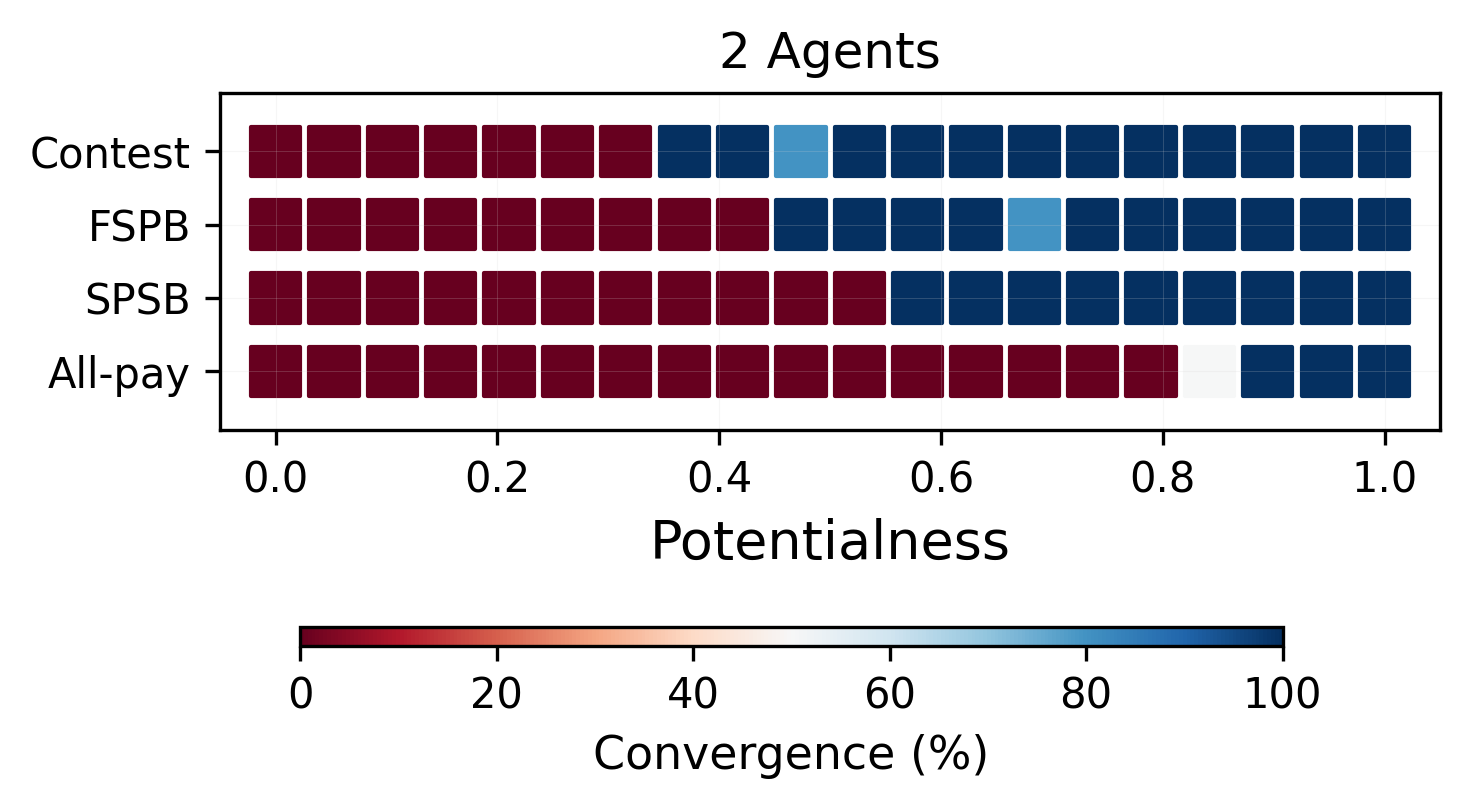

In [107]:
list_games = ["allpay", "spsb", "fpsb", "contest"]
label_games = ["All-pay", "SPSB", "FSPB", "Contest"]
generate_plot_learning_random(list_games, label_games, 2, 11)

In [137]:
fig = plt.figure(tight_layout = True, dpi=DPI, figsize=(5,4))
cbar_ax = fig.add_axes([1.0, 0.30, 0.03, 0.45])

for i, n_agents in enumerate(list_agents):
    # prepare plot
    ax = fig.add_subplot(2, 1, i+1)
    if i == 1:
        ax.set_xlabel("Potentialness", fontsize=FONTSIZE_LABEL)
    ax.set_ylabel("# Actions", fontsize=FONTSIZE_LABEL)
    ax.set_ylim(min(list_actions)-0.8,max(list_actions)+0.8)
    ax.set_yticks(list_actions)
    ax.set_xlim(-0.02, 1.02)
    ax.grid(linestyle="-", linewidth=0.25, color="lightgrey", zorder=-10, alpha=0.2)
    ax.set_title(f"{n_agents} Agents",)

    # get data
    for n_actions in list_actions:

        setting = f"random_matrix_game_uniform_{n_agents}_{n_actions}"
        df = pd.read_csv(f"{PATH_TO_DATA}{tag}/{learner}_{setting}.csv")
        df["potentialness"] = map_bin_to_potentialness(df["bin"], n_bins)
        df = df.groupby(["potentialness"]).agg({"convergence":"mean"}).reset_index()
    
        # plot results
        sc = ax.scatter(
                df.potentialness,
                n_actions * np.ones(len(df)),
                marker="s",
                s=150,
                c=np.array(df.convergence) * 100,
                cmap="RdYlGn",
                vmin=0,
                vmax=100,
                )
                
cbar = fig.colorbar(sc, cax=cbar_ax)
cbar.set_label('Convergence (%)', fontsize=FONTSIZE_LABEL)

array(['allpay', 'contest', 'fpsb', 'spsb'], dtype=object)

In [125]:
tag = "random_learning"

n_agents = 2
n_actions = 2
n_bins = 20

for n_agents in [2,3]:
    for n_actions in [2,3,4,5]:
        setting = f"random_matrix_game_uniform_{n_agents}_{n_actions}"
        df = pd.read_csv(f"{PATH_TO_DATA}{tag}/{learner}_{setting}.csv")
        df = 
        df["potentialness"] = map_bin_to_potentialness(df["bin"], n_bins)
        #df = df.groupby(["potentialness"]).agg({"convergence":"mean"}).reset_index()



In [126]:
df

,convergence,iterations,utility_loss,seed,run,bin,potentialness
0,True,38,1.708156e-11,909809,0,9,0.425
1,True,38,8.902878e-12,909809,1,9,0.425
2,True,37,6.773915e-12,909809,2,9,0.425
3,False,2000,6.778813e-01,909809,3,9,0.425
4,True,18,3.575307e-11,909809,4,9,0.425
...,...,...,...,...,...,...,...
995,True,50,9.849010e-11,235798,5,11,0.525
996,False,2000,4.251073e-01,235798,6,11,0.525
997,True,55,4.971967e-11,235798,7,11,0.525
998,True,16,6.584755e-11,235798,8,11,0.525


/home/oberlechner/projects/matrix_game_learning/venv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/oberlechner/projects/matrix_game_learning/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


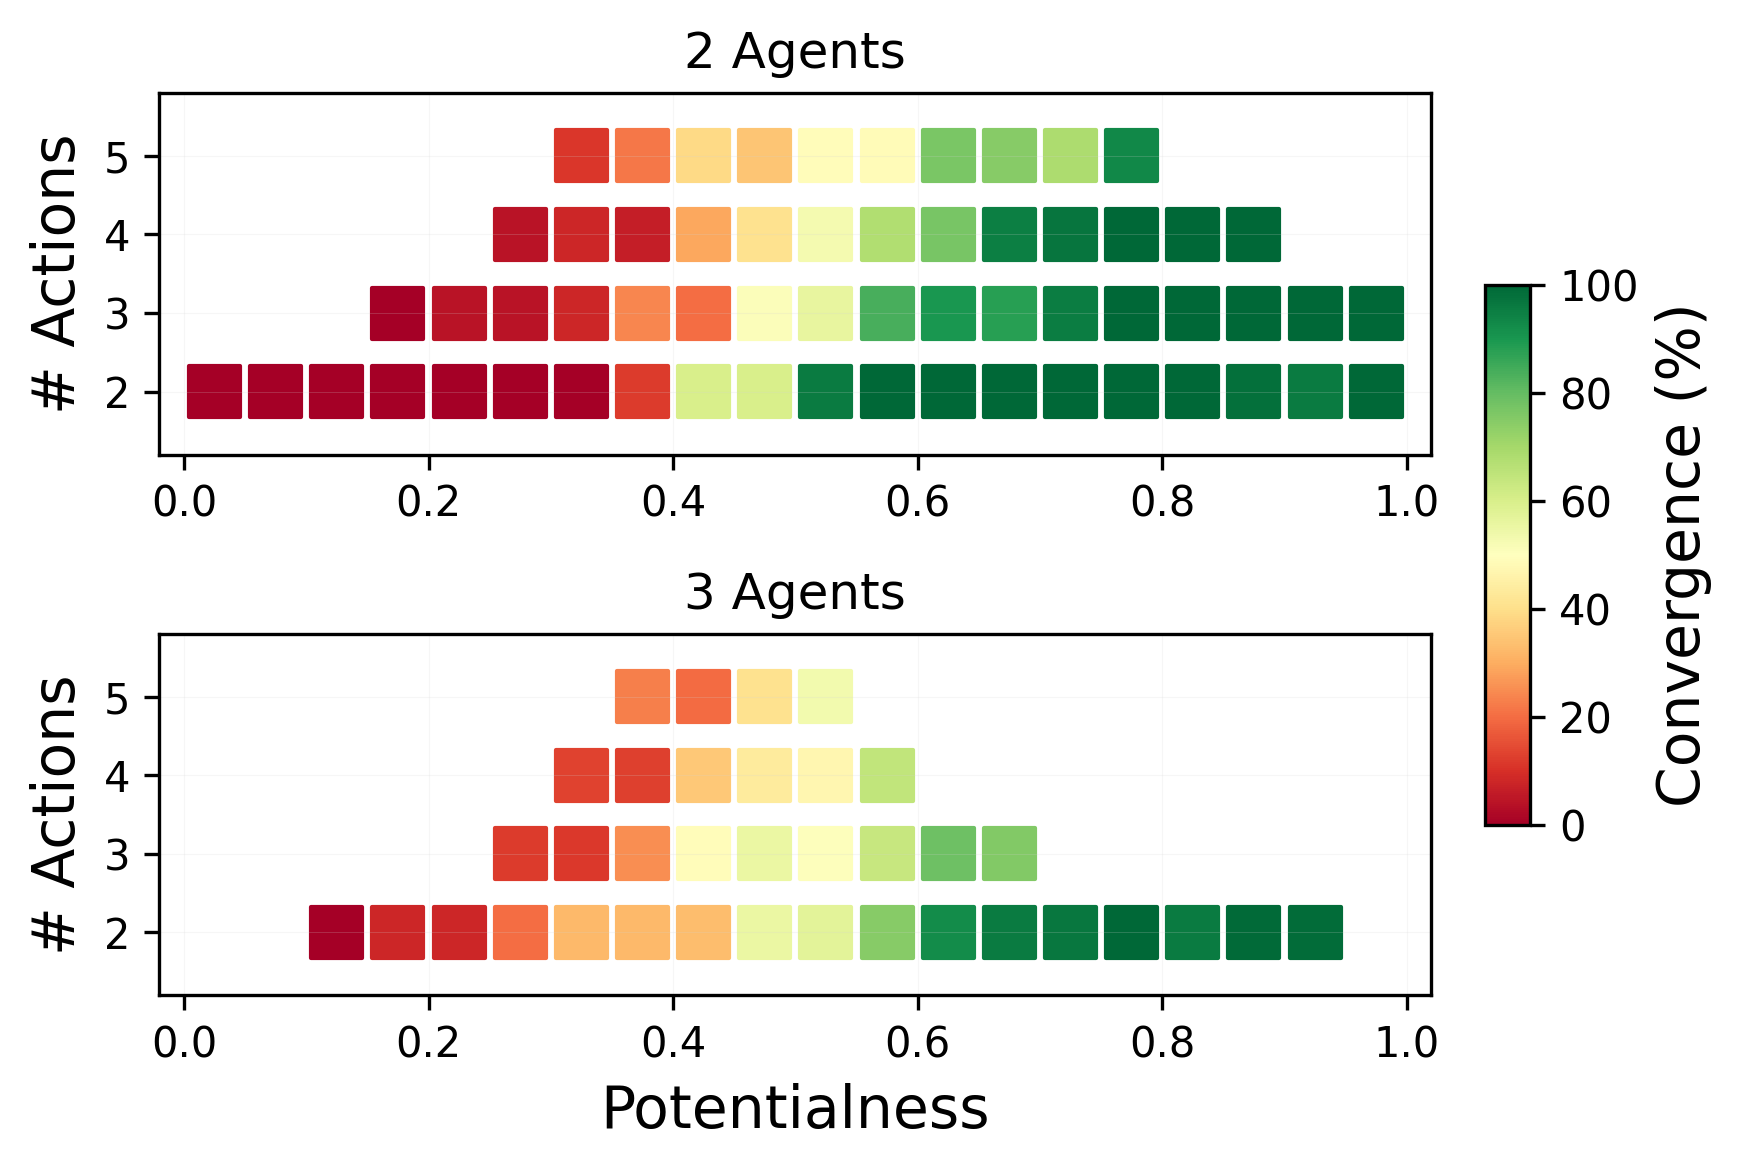

In [105]:
fig = plt.figure(tight_layout = True, dpi=DPI, figsize=(5,4))
cbar_ax = fig.add_axes([1.0, 0.30, 0.03, 0.45])

for i, n_agents in enumerate(list_agents):
    # prepare plot
    ax = fig.add_subplot(2, 1, i+1)
    if i == 1:
        ax.set_xlabel("Potentialness", fontsize=FONTSIZE_LABEL)
    ax.set_ylabel("# Actions", fontsize=FONTSIZE_LABEL)
    ax.set_ylim(min(list_actions)-0.8,max(list_actions)+0.8)
    ax.set_yticks(list_actions)
    ax.set_xlim(-0.02, 1.02)
    ax.grid(linestyle="-", linewidth=0.25, color="lightgrey", zorder=-10, alpha=0.2)
    ax.set_title(f"{n_agents} Agents",)

    # get data
    for n_actions in list_actions:

        setting = f"random_matrix_game_uniform_{n_agents}_{n_actions}"
        df = pd.read_csv(f"{PATH_TO_DATA}{tag}/{learner}_{setting}.csv")
        df["potentialness"] = map_bin_to_potentialness(df["bin"], n_bins)
        df = df.groupby(["potentialness"]).agg({"convergence":"mean"}).reset_index()
    
        # plot results
        sc = ax.scatter(
                df.potentialness,
                n_actions * np.ones(len(df)),
                marker="s",
                s=150,
                c=np.array(df.convergence) * 100,
                cmap="RdYlGn",
                vmin=0,
                vmax=100,
                )
                
cbar = fig.colorbar(sc, cax=cbar_ax)
cbar.set_label('Convergence (%)', fontsize=FONTSIZE_LABEL)

In [64]:
def plot_learning(list_agents, list_actions, n_bins):

    for n_agents in list_agents:
        plt.figure(figsize=(6,2))
        for n_actions in list_actions:
            setting = f"random_matrix_game_uniform_{n_agents}_{n_actions}"
            df = pd.read_csv(f"{PATH_TO_DATA}{tag}/{learner}_{setting}.csv")
            df["potentialness"] = map_bin_to_potentialness(df["bin"], n_bins)
            df = df.groupby(["potentialness"]).agg({"convergence":"mean"}).reset_index()

            plt.scatter(
                df.potentialness,
                n_actions * np.ones(len(df)),
                marker="s",
                s=150,
                c=np.array(df.convergence) * 100,
                cmap="RdYlGn",
                vmin=0,
                vmax=100,
            )
            plt.xlim(-0.02, 1.02)
            plt.xlabel("Potentialness")
            plt.yticks(list_actions)
            plt.ylim(min(list_actions)-0.8,max(list_actions)+0.8)
            plt.ylabel("# Actions")
            plt.title(f"{n_agents} Agents")


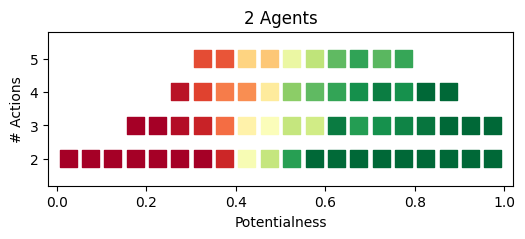

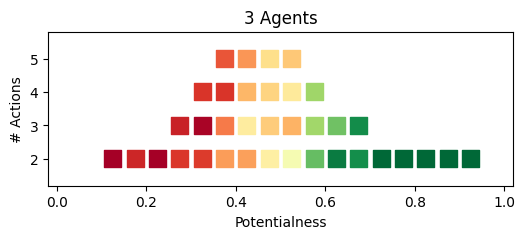

In [65]:
list_agents = [2, 3]
list_actions= [2, 3, 4, 5]
n_bins = 20

plot_learning(list_agents, list_actions, n_bins)

In [70]:
def set_axis(xlim, ylim, title, xlabel: str = "", ylabel: str = ""):
    """General settings for axis"""
    fig = plt.figure(tight_layout=True, dpi=DPI, figsize=(6,5))
    ax = fig.add_subplot(111)
    ax.set_xlabel(xlabel, fontsize=FONTSIZE_LABEL)
    ax.set_ylabel(ylabel, fontsize=FONTSIZE_LABEL)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.grid(linestyle="-", linewidth=0.25, color="lightgrey", zorder=-10, alpha=0.2)
    ax.set_title(title, fontsize=FONTSIZE_TITLE)
    return fig, ax

(<Figure size 1800x1500 with 1 Axes>,
 <Axes: title={'center': 'test'}, xlabel='test1', ylabel='test3'>)

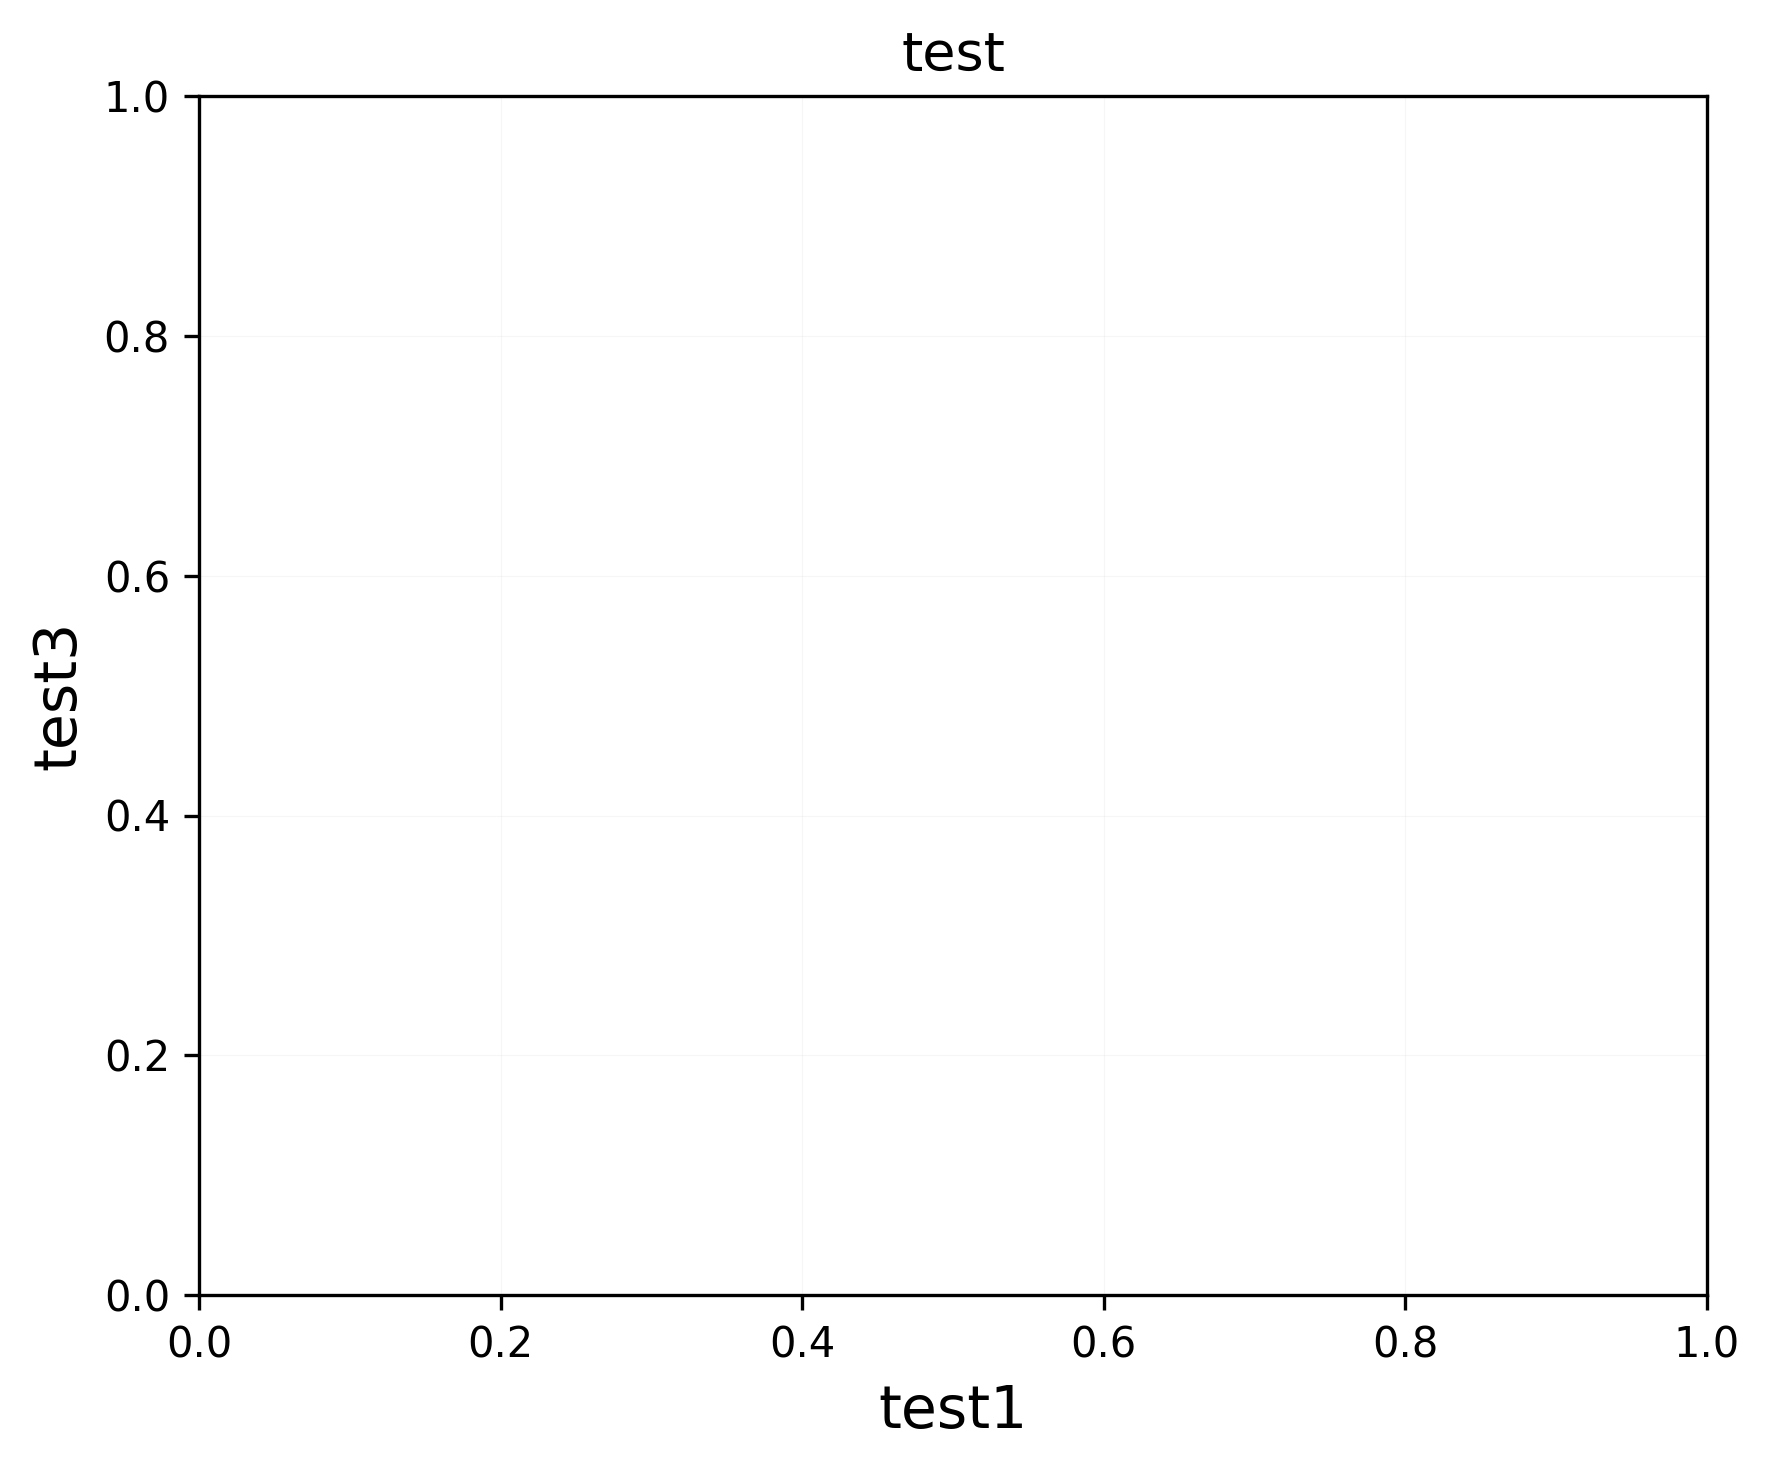

In [69]:
set_axis((0,1), (0, 1), "test", "test1", "test3")

In [121]:
import matplotlib

cmap = matplotlib.colormaps['RdBu']

rgba = cmap(0.8)

In [122]:
rgba

(0.2627450980392157, 0.5764705882352941, 0.7647058823529411, 1.0)

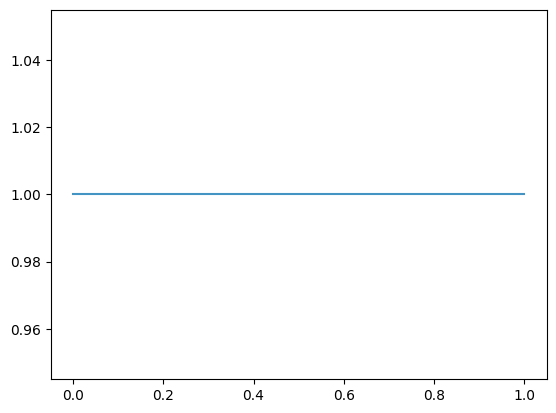

In [123]:
plt.plot([0,1],[1,1], color=rgba)